In [1]:
import sys
import time
import numpy as np
import numba
from numba import prange
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import multiprocessing

sys.path.append('../lib/')
from utils import *
from graph import *
from preprocessing import *
import gmr
import gmr_v0
import gmr_v1

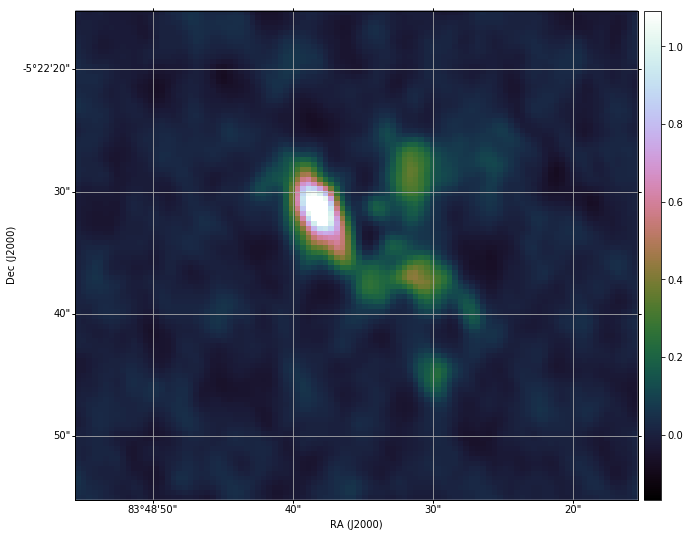

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs)

In [3]:
# mask of significant emission pixels
mask = compute_mask(data, 0.089)

# initial w
w = (data[mask]).astype(np.float64)

# pixels positions
_x = np.linspace(0., 1., data.shape[0]+1, endpoint=True)
_y = np.linspace(0., 1., data.shape[1]+1, endpoint=True)
xpos = np.asarray( [(_x[i]+_x[i+1])/2 for i in range(len(_x)-1)] )
ypos = np.asarray( [(_y[i]+_y[i+1])/2 for i in range(len(_y)-1)] )
X,Y  = np.meshgrid(xpos, ypos, indexing='ij')
xgrid = X.ravel()
ygrid = Y.ravel()
xc = X[mask]
yc = Y[mask]
mu = np.vstack([xc,yc]).T

# sigma
pix_lenght = min(1./data.shape[0], 1./data.shape[1])
k = 0.25
sig = (pix_lenght/(2.*k))*np.ones(w.shape[0])

/Users/martin/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


***

In [ ]:
t0 = time.time()
gmr_v0.mixture_reduction(w, mu, sig, 200, verbose=False)
print("Elapsed time: {0}".format(time.time()-t0))

In [13]:
t1 = time.time()
gmr_v1.mixture_reduction(w, mu, sig, 200, verbose=False)
print("Elapsed time: {0}".format(time.time()-t1))

Elapsed time: 101.93125295639038


In [4]:
t2 = time.time()
gmr.mixture_reduction(w, mu, sig, 200, verbose=False)
print("Elapsed time: {0}".format(time.time()-t2))

LoweringError: Failed at nopython (nopython mode backend)
'i_min'
File "../lib/gmr.py", line 351
[1] During: lowering "$136.3 = build_tuple(items=[Var(i_min, ../lib/gmr.py (349)), Var(j_min, ../lib/gmr.py (349))])" at ../lib/gmr.py (351)

***

In [16]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
gmr_v0.mixture_reduction(w, mu, sig, 200, verbose=False)

 
*** Profile printout saved to text file 'gmr_v0_prof'. 


In [17]:
print(open('gmr_v0_prof', 'r').read())

         68713333 function calls in 3371.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 68698200 3227.641    0.000 3227.641    0.000 gmr_v0.py:205(kl_diss)
        1  143.327  143.327 3371.000 3371.000 gmr_v0.py:332(mixture_reduction)
      549    0.009    0.000    0.009    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      549    0.004    0.000    0.004    0.000 gmr_v0.py:77(merge)
        1    0.003    0.003    0.009    0.009 gmr_v0.py:339(<listcomp>)
      549    0.003    0.000    0.016    0.000 fromnumeric.py:1934(any)
      749    0.002    0.000    0.003    0.000 twodim_base.py:140(eye)
      549    0.001    0.000    0.011    0.000 {method 'any' of 'numpy.ndarray' objects}
     1647    0.001    0.000    0.001    0.000 {built-in method builtins.max}
      549    0.001    0.000    0.001    0.000 {built-in method numpy.core.multiarray.array}
      749    0.001    0.000    0.001    0.000 {built-in method numpy.co

***

In [18]:
%%prun -s tottime -q -l 30 -T gmr_v1_prof
gmr_v1.mixture_reduction(w, mu, sig, 200, verbose=False)

 
*** Profile printout saved to text file 'gmr_v1_prof'. 


In [19]:
print(open('gmr_v1_prof', 'r').read())

         28418064 function calls in 306.380 seconds

   Ordered by: internal time
   List reduced from 54 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1  231.219  231.219  306.380  306.380 gmr_v1.py:350(mixture_reduction)
 28215936   69.888    0.000   69.888    0.000 gmr_v1.py:205(kl_diss)
      549    4.589    0.008    5.045    0.009 gmr_v1.py:332(update_nn_indexes)
    97420    0.463    0.000    0.463    0.000 {method 'remove' of 'list' objects}
      550    0.054    0.000    0.082    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
      549    0.032    0.000    0.169    0.000 gmr_v1.py:345(radius_search)
      749    0.027    0.000    0.027    0.000 {method 'sort' of 'list' objects}
     1101    0.015    0.000    0.081    0.000 validation.py:310(check_array)
     1102    0.014    0.000    0.014    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     5508    0.014    0.000    0.014   

***

In [5]:
%%prun -s tottime -q -l 30 -T gmr_v2_prof
gmr.mixture_reduction(w, mu, sig, 200, verbose=False)

LoweringError: Failed at nopython (nopython mode backend)
'i_min'
File "../lib/gmr.py", line 351
[1] During: lowering "$136.3 = build_tuple(items=[Var(i_min, ../lib/gmr.py (349)), Var(j_min, ../lib/gmr.py (349))])" at ../lib/gmr.py (351)

In [ ]:
print(open('gmr_v2_prof', 'r').read())